In [ ]:
#import required packages needed for assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
from scipy import stats


In [ ]:
# Load the dataset
df = pd.read_csv('/content/EastWestAirlines.csv')
df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.head()#shows first five values of the dataset by default

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.tail()#shows last five values of dataset by default

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [ ]:
df.shape #shows no.of rows and coloumns of the dataset

(3999, 12)

In [ ]:
df.describe() #provides statistical information of the datasetb

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df_imputed)

         ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0        1.0  28143.0         0.0        1.0        1.0        1.0   
1        2.0  19244.0         0.0        1.0        1.0        1.0   
2        3.0  41354.0         0.0        1.0        1.0        1.0   
3        4.0  14776.0         0.0        1.0        1.0        1.0   
4        5.0  97752.0         0.0        4.0        1.0        1.0   
...      ...      ...         ...        ...        ...        ...   
3994  4017.0  18476.0         0.0        1.0        1.0        1.0   
3995  4018.0  64385.0         0.0        1.0        1.0        1.0   
3996  4019.0  73597.0         0.0        3.0        1.0        1.0   
3997  4020.0  54899.0         0.0        1.0        1.0        1.0   
3998  4021.0   3016.0         0.0        1.0        1.0        1.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           174.0          1.0                0.0              0.0   
1           215.0  

In [ ]:
# Remove outliers using Z-score (simple method)
df_clean = df_imputed[(abs(stats.zscore(df_imputed)) < 3).all(axis=1)]
print(df_clean)

         ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0        1.0  28143.0         0.0        1.0        1.0        1.0   
1        2.0  19244.0         0.0        1.0        1.0        1.0   
2        3.0  41354.0         0.0        1.0        1.0        1.0   
3        4.0  14776.0         0.0        1.0        1.0        1.0   
4        5.0  97752.0         0.0        4.0        1.0        1.0   
...      ...      ...         ...        ...        ...        ...   
3994  4017.0  18476.0         0.0        1.0        1.0        1.0   
3995  4018.0  64385.0         0.0        1.0        1.0        1.0   
3996  4019.0  73597.0         0.0        3.0        1.0        1.0   
3997  4020.0  54899.0         0.0        1.0        1.0        1.0   
3998  4021.0   3016.0         0.0        1.0        1.0        1.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0           174.0          1.0                0.0              0.0   
1           215.0  

In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
print(df_scaled)

           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.766325 -0.523260   -0.158869  -0.755664        0.0        0.0   
1    -1.765460 -0.667084   -0.158869  -0.755664        0.0        0.0   
2    -1.764596 -0.309747   -0.158869  -0.755664        0.0        0.0   
3    -1.763731 -0.739295   -0.158869  -0.755664        0.0        0.0   
4    -1.762866  0.601746   -0.158869   1.517591        0.0        0.0   
...        ...       ...         ...        ...        ...        ...   
3625  1.707275 -0.679496   -0.158869  -0.755664        0.0        0.0   
3626  1.708139  0.062475   -0.158869  -0.755664        0.0        0.0   
3627  1.709004  0.211358   -0.158869   0.759839        0.0        0.0   
3628  1.709869 -0.090836   -0.158869  -0.755664        0.0        0.0   
3629  1.710734 -0.929358   -0.158869  -0.755664        0.0        0.0   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       -0.779029    -1.147142          -0.401822    

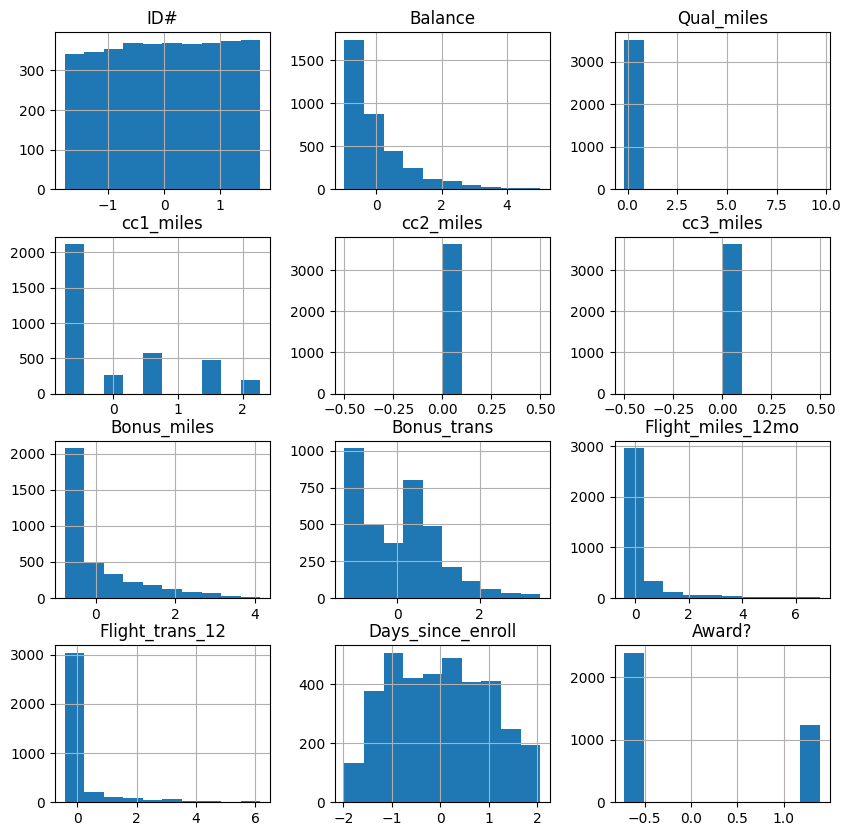

In [ ]:
#Exploratory Data Analysis (EDA)
# Plot histograms of features
df_scaled.hist(figsize=(10, 10))
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

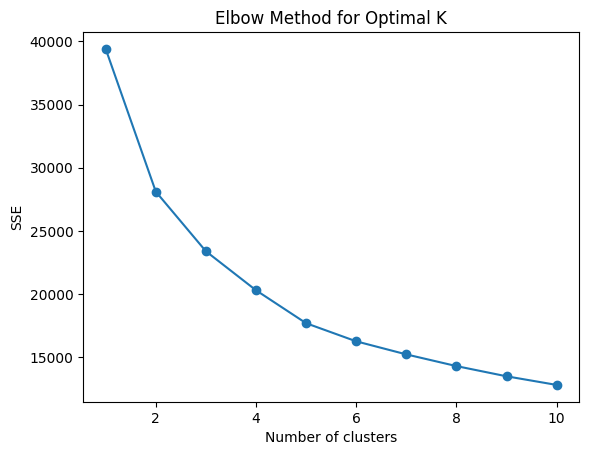

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for K-Means: 0.3568940056577175


In [ ]:
#2.Implementing Clustering Algorithms
#2.1. K-Means Clustering
# Determine the optimal number of clusters using Elbow method
#The Elbow Method helps determine the optimal number of clusters by plotting the Within-Cluster Sum of Squares (WCSS)
# against the number of clusters and identifying the point where the rate of decrease slows significantly.
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with chosen K (e.g., K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Evaluate clustering
silhouette_avg = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')



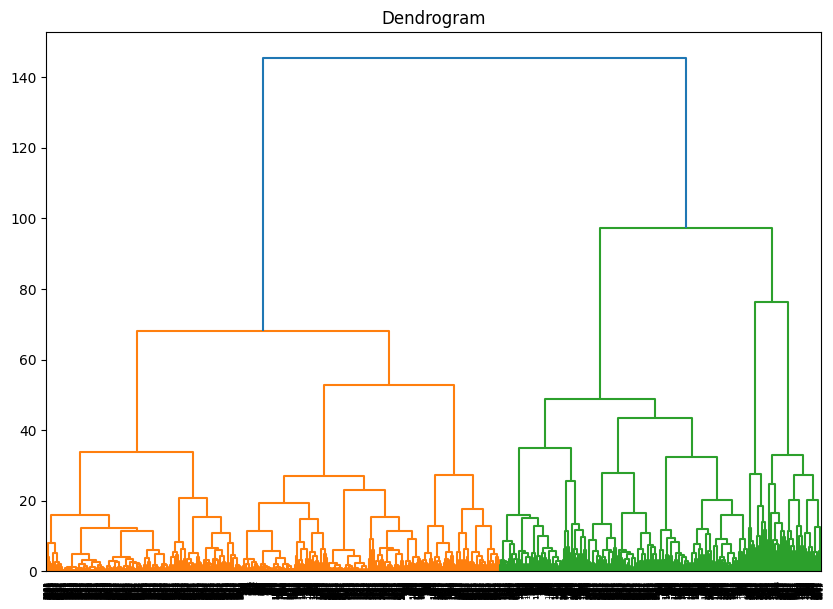

Silhouette Score for Hierarchical Clustering: 0.3055978199069357


In [ ]:
#2.2. Hierarchical Clustering
# Perform hierarchical clustering
linked = sch.linkage(df_scaled, method='ward')

# Plot Dendrogram
#A dendrogram shows how clusters are merged in hierarchical clustering,
# helping to determine the optimal number of clusters by visualizing where merging distances increase significantly.
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title('Dendrogram')
plt.show()

# Form clusters
labels = fcluster(linked, t=3, criterion='maxclust')
df_scaled['Cluster'] = labels

# Evaluate clustering
silhouette_avg = silhouette_score(df_scaled, df_scaled['Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')


In [ ]:
#DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['Cluster'] = dbscan.fit_predict(df_scaled)

# Evaluate clustering
# Note: DBSCAN might label some points as noise (-1), so handle this when calculating silhouette score
if len(set(df_scaled['Cluster'])) > 1:
    silhouette_avg = silhouette_score(df_scaled, df_scaled['Cluster'])
    print(f'Silhouette Score for DBSCAN: {silhouette_avg}')
else:
    print('DBSCAN found only one cluster or noise.')


Silhouette Score for DBSCAN: 0.14439531900518815


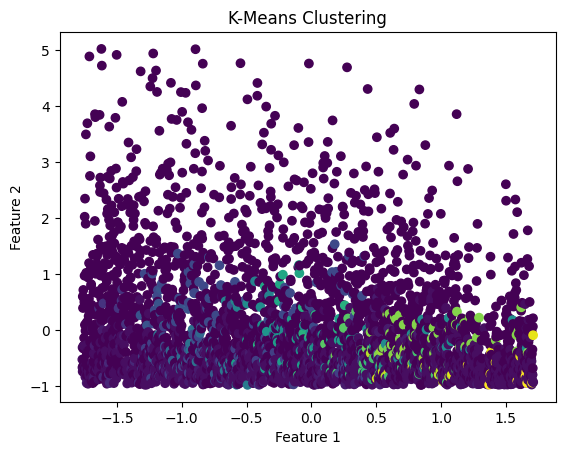

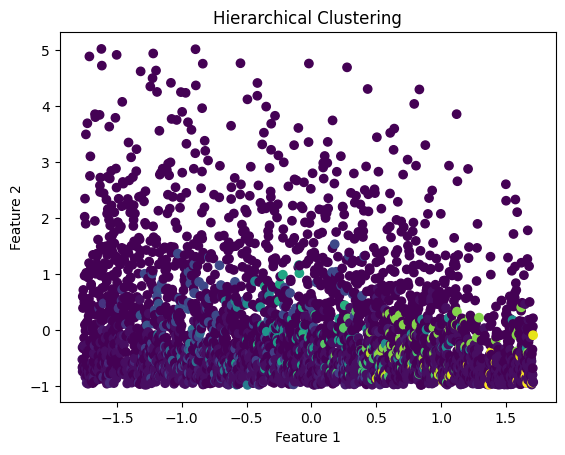

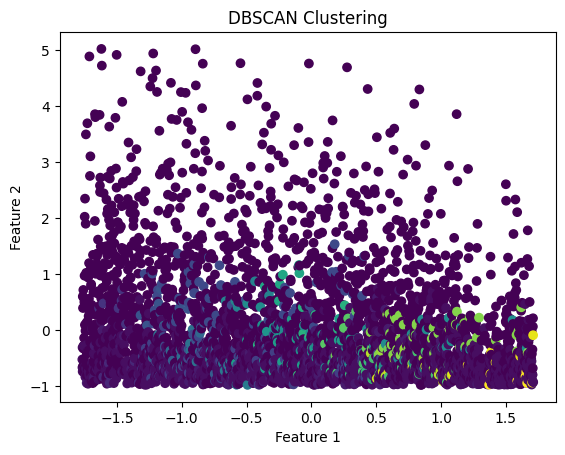

In [ ]:
#visualize clusters
# Plot clusters for K-Means
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot clusters for Hierarchical Clustering
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot clusters for DBSCAN
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming df_scaled is the scaled data and the cluster labels from K-Means are in the 'Cluster' column
kmeans_silhouette = silhouette_score(df_scaled, df_scaled['Cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.14439531900518815


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming df_scaled is the scaled data and the cluster labels from DBSCAN are in the 'Cluster' column of df_scaled
# Exclude noise points with label -1
non_noise_mask = df_scaled['Cluster'] != -1
dbscan_silhouette = silhouette_score(df_scaled[non_noise_mask], df_scaled['Cluster'][non_noise_mask])

print("DBSCAN Silhouette Score:", dbscan_silhouette)

DBSCAN Silhouette Score: 0.40963940765477225


In [ ]:
Interpreting Silhouette Scores:

- +1:Data points are well-clustered and appropriately assigned to their clusters, indicating strong and clear clustering.

- 0:Data points are near the decision boundary between two neighboring clusters, suggesting that the clusters are not well-separated.

--1:Data points may have been assigned to the wrong clusters, indicating poor clustering quality.